In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('dsu1.jpg')

res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [10]:
import cv2
import numpy as np

img = cv2.imread('dsu1.jpg',0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [18]:
img = cv2.imread('dsu1.jpg',0)
rows,cols = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()



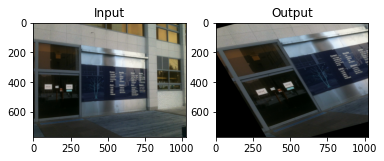

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('dsu1.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()


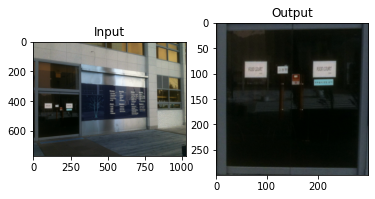

In [40]:
img = cv2.imread('dsu1.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[10,330],[320,348],[10,670],[330,630]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()


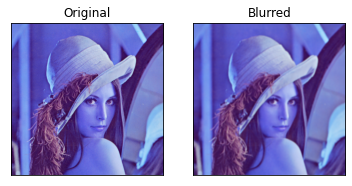

In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('lena.png')
blur = cv2.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
import numpy as np
import cv2
def run_main():
    cap = cv2.VideoCapture(0)
    cap.set(cv2.cv.CV_CAP_PROP_FRAME_WIDTH, 1280)
    cap.set(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT, 720)
    while(True):
        ret, frame = cap.read()
        roi = frame[0:500, 0:500]
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
        thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY_INV, 11, 1)
        kernel = np.ones((3, 3), np.uint8)
        closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE,
        kernel, iterations=4)
        cont_img = closing.copy()
        contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL,
                                               cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area < 2000 or area > 4000:
                continue
            if len(cnt) < 5:
                continue
            ellipse = cv2.fitEllipse(cnt)
            cv2.ellipse(roi, ellipse, (0,255,0), 2)
        cv2.imshow("Morphological Closing", closing)
        cv2.imshow("Adaptive Thresholding", thresh)
        cv2.imshow('Contours', roi)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
if __name__ == "__main__":
    run_main()